In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-dataset/zomato.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


df1= pd.read_csv('/kaggle/input/zomato-dataset/zomato.csv')
df=df1.copy()


In [3]:
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [5]:
df= df.drop(['address','phone','dish_liked','listed_in(city)','cuisines','reviews_list','menu_item'], axis = 1)

In [6]:
df.head()

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,800,Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,800,Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining",800,Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,300,Buffet
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,600,Buffet


In [7]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [8]:
df.nunique()

url                            51717
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
location                          93
rest_type                         93
approx_cost(for two people)       70
listed_in(type)                    7
dtype: int64

In [9]:
df.isna().sum()

url                               0
name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
approx_cost(for two people)     346
listed_in(type)                   0
dtype: int64

number of restaurant 

In [10]:
url = df.shape[0]

print("total number of restaurant:",url)

total number of restaurant: 51717


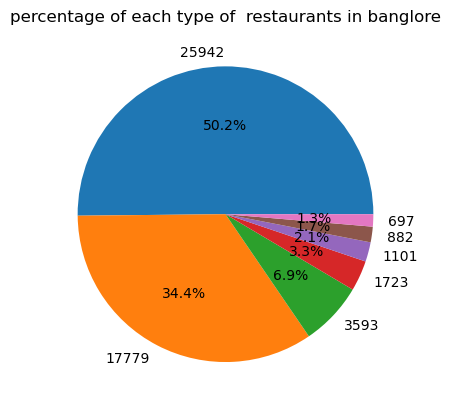

In [11]:
url_count=df['listed_in(type)'].value_counts()
plt.pie(url_count,labels=url_count,autopct='%1.1f%%')

plt.title('percentage of each type of  restaurants in banglore')
plt.show()

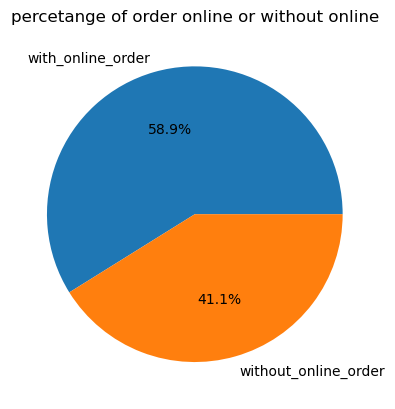

In [12]:
online_order_count = df['online_order'].value_counts()
plt.pie(online_order_count,labels=['with_online_order','without_online_order'],autopct='%1.1f%%')

plt.title('percetange of order online or without online')

plt.show()

In [13]:
book_table_count=df['book_table'].value_counts()

print("number of restaurant with table booking:", book_table_count[1])
print("number of restaurant without table booking:", book_table_count[0])

number of restaurant with table booking: 6449
number of restaurant without table booking: 45268


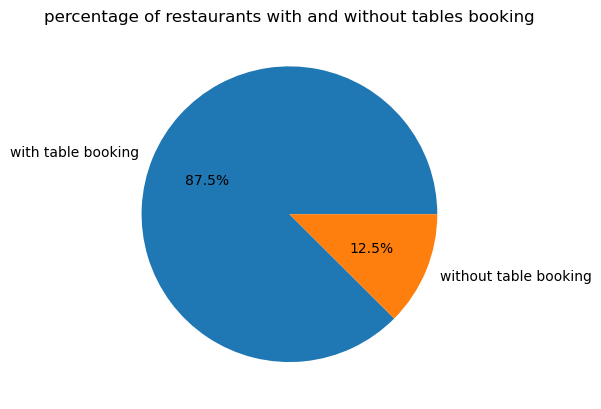

In [14]:
book_table_count=df['book_table'].value_counts()
plt.pie(book_table_count,labels=['with table booking','without table booking'],autopct="%1.1f%%")

plt.title('percentage of restaurants with and without tables booking')

plt.show()

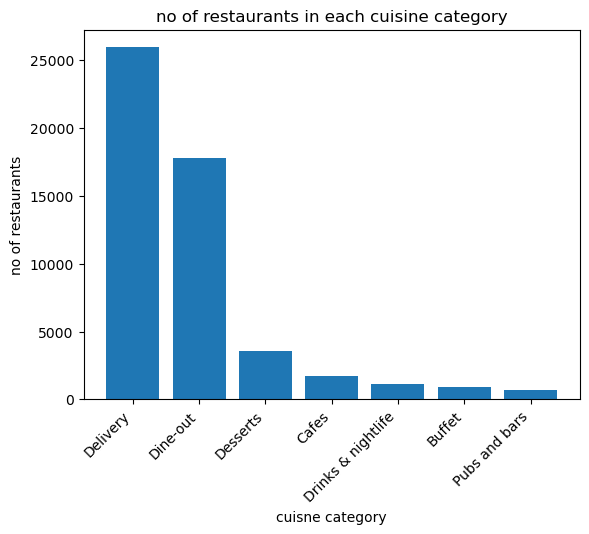

In [15]:
cuisine_counts=df['listed_in(type)'].value_counts()

plt.bar(cuisine_counts.index,cuisine_counts)

plt.title('no of restaurants in each cuisine category')
plt.xlabel('cuisne category')
plt.ylabel('no of restaurants')

plt.xticks(rotation=45, ha='right')


plt.show()


In [16]:
location_counts=df['location'].value_counts()

print("the location with highest no of resturants:",location_counts.index[0])


the location with highest no of resturants: BTM


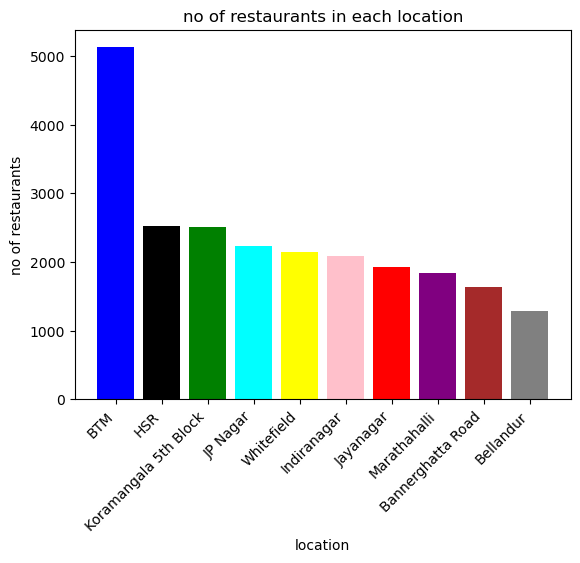

In [17]:
location_counts=df['location'].value_counts().nlargest(10)

 
colors=['blue','black','green','cyan','yellow','pink','red','purple','brown','grey']

plt.bar(location_counts.index,location_counts,color=colors) 

plt.title('no of restaurants in each location')
plt.xlabel('location')
plt.ylabel('no of restaurants')

plt.xticks(rotation=45, ha='right')


plt.show()


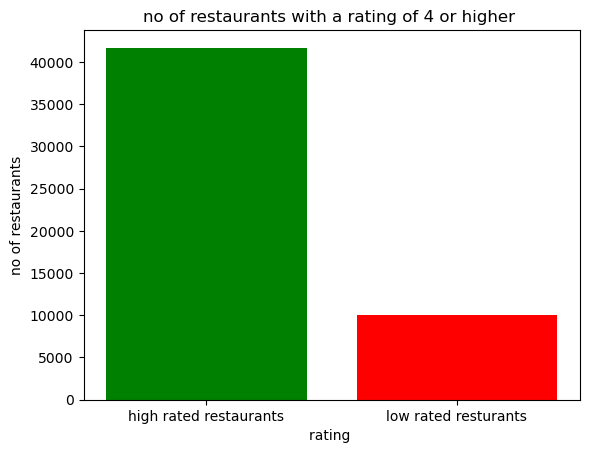

In [18]:
high_rated_restaurants = df[df['votes'] >=4]['votes'].count()

low_rated_restaurants = df[df['votes'] < 4]['votes'].count()

plt.bar(['high rated restaurants','low rated resturants'],[high_rated_restaurants,low_rated_restaurants], color=['green','red'])
        
    
plt.title('no of restaurants with a rating of 4 or higher ')
plt.xlabel('rating ')
plt.ylabel('no of restaurants')




plt.show()
        

In [19]:
average_rating = df['votes'].mean()


print(f"the average rating of restaurant in bangalore is {average_rating:2f}")




the average rating of restaurant in bangalore is 283.697527
